# **Import needed libraries**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'tensorflow'

zsh:1: command not found: ls


### Chargement des donnees

In [5]:
Train_df = 'data/Training'

filepaths = []
labels = []
folds = os.listdir(Train_df)
for fold in folds:
    FoldPath = os.path.join(Train_df, fold)
    files = os.listdir(FoldPath)
    for file in tqdm(files):
        filepath = os.path.join(FoldPath,file)
        filepaths.append(filepath)
        labels.append(fold)

100%|██████████████████████████████████| 1339/1339 [00:00<00:00, 1249982.87it/s]


In [6]:
print(len(filepaths))
print(len(labels))

5712
5712


In [7]:
print(labels[-1])

meningioma


In [8]:
print(np.unique(labels))

['glioma' 'meningioma' 'notumor' 'pituitary']


In [9]:
df_train = pd.DataFrame(
    data = {
        'filepath': filepaths,
        'label': labels
    }
)

In [10]:
df_train.head()

,filepath,label
0,data/Training/pituitary/Tr-pi_0505.jpg,pituitary
1,data/Training/pituitary/Tr-pi_0263.jpg,pituitary
2,data/Training/pituitary/Tr-pi_0277.jpg,pituitary
3,data/Training/pituitary/Tr-pi_1169.jpg,pituitary
4,data/Training/pituitary/Tr-pi_0511.jpg,pituitary


In [11]:
color = ['#9AA6B2','#BCCCDC','#D9EAFD','#F8FAFC']

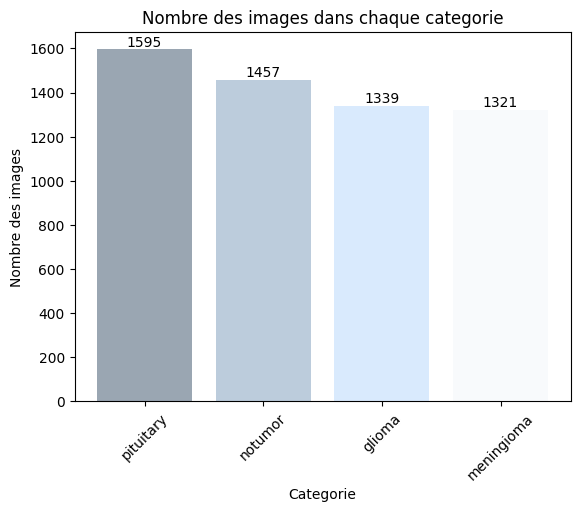

In [12]:
fig, ax = plt.subplots()
bars = ax.bar(df_train['label'].unique(), df_train['label'].value_counts(),color=color)
ax.bar_label(bars)
plt.title('Nombre des images dans chaque categorie')
plt.xlabel('Categorie')
plt.ylabel('Nombre des images')
plt.xticks(rotation=45)

plt.show()


In [13]:
df_train.sample(5)

,filepath,label
1515,data/Training/notumor/Tr-no_0148.jpg,notumor
1317,data/Training/pituitary/Tr-pi_0457.jpg,pituitary
3818,data/Training/glioma/Tr-gl_0337.jpg,glioma
5263,data/Training/meningioma/Tr-me_0729.jpg,meningioma
148,data/Training/pituitary/Tr-pi_0895.jpg,pituitary


In [14]:
Test_df = 'data/Testing'

filepaths = []
labels = []
folds = os.listdir(Test_df)
for fold in folds:
    FoldPath = os.path.join(Test_df, fold)
    files = os.listdir(FoldPath)
    for file in tqdm(files):
        filepath = os.path.join(FoldPath,file)
        filepaths.append(filepath)
        labels.append(fold)

100%|█████████████████████████████████████| 306/306 [00:00<00:00, 558267.52it/s]


In [15]:
print(len(filepaths))
print(len(labels))


1311
1311


In [16]:
print(np.unique(labels))

['glioma' 'meningioma' 'notumor' 'pituitary']


In [17]:
 df_test = pd.DataFrame(
    data = {
        'filepath': filepaths,
        'label': labels
    }
)

In [18]:
df_test.head()

,filepath,label
0,data/Testing/pituitary/Te-pi_0233.jpg,pituitary
1,data/Testing/pituitary/Te-pi_0227.jpg,pituitary
2,data/Testing/pituitary/Te-pi_0019.jpg,pituitary
3,data/Testing/pituitary/Te-pi_0031.jpg,pituitary
4,data/Testing/pituitary/Te-pi_0025.jpg,pituitary


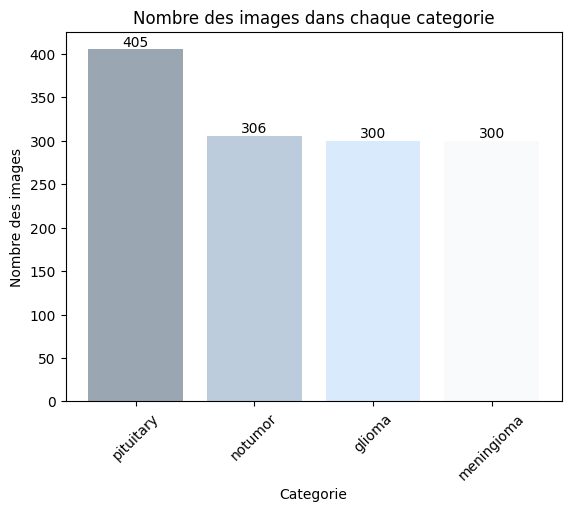

In [19]:

fig, ax = plt.subplots()
bars = ax.bar(df_test['label'].unique(), df_test['label'].value_counts(),color=color)
ax.bar_label(bars)
plt.title('Nombre des images dans chaque categorie')
plt.xlabel('Categorie')
plt.ylabel('Nombre des images')
plt.xticks(rotation=45)

plt.show()


### Partage des donnees

In [20]:
valid_ts, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [21]:
tr_gen = ImageDataGenerator(rescale=1/255)
ts_gen = ImageDataGenerator(rescale=1/255)
batchsize = 32
img_size = (224,224)

In [22]:
gen_train = tr_gen.flow_from_dataframe(df_train, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=True,color_mode='rgb')
gen_valid = ts_gen.flow_from_dataframe(valid_ts, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=True,color_mode='rgb')
gen_test = ts_gen.flow_from_dataframe(df_test, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=False ,color_mode='rgb')

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [23]:
class_dict = gen_train.class_indices


#### Construction du modele

In [24]:
Model = Sequential([
    Conv2D(64, kernel_size= (3,3), activation='relu', input_shape=(img_size[0],img_size[1],3)),
    Conv2D(64, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, kernel_size= (3,3), activation='relu'),
    Conv2D(128, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(265, kernel_size= (3,3), activation='relu'),
    Conv2D(265, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3), activation='relu'),
    Conv2D(512, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3), activation='relu'),
    Conv2D(512, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0,3),
    Dense(4, activation='softmax') ])

In [25]:
Model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = Model.fit(
    gen_train, 
    epochs=50, 
    validation_data=gen_valid, 
    verbose=1, 
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)


Epoch 1/50
179/179 [==============================] - 454s 3s/step - loss: 1.1362 - accuracy: 0.4484 - val_loss: 0.9592 - val_accuracy: 0.5969
Epoch 2/50
 55/179 [========>.....................] - ETA: 5:14 - loss: 0.8336 - accuracy: 0.6670

In [ ]:
print(Model.evaluate(gen_train))
print(Model.evaluate(gen_valid))
print(Model.evaluate(gen_test))

In [ ]:
Model.save('Model m.h5')

In [ ]:
preds = Model.predict(gen_test)
y_pred = np.argmax(preds, axis=1)


In [ ]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

Visualize model performance

In [ ]:
def predict(img_path):

    
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = Model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

In [ ]:
predict('data/Testing/glioma/Te-gl_0010.jpg')

In [ ]:
predict('data/Testing/notumor/Te-no_0017.jpg')

In [ ]:
predict('data/Testing/pituitary/Te-pi_0059.jpg')

 # **NOTE** : --> It is clear that there is overfitting, so I will use a pretrained model.

In [ ]:
base_model = tf.keras.applications.EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=(img_size[0],img_size[1],3),
    pooling='max',
)

In [ ]:
ModelPretrained = Sequential([
    base_model,
    
    Dense(256 , activation='relu'),
    Dropout(0,3),
    Dense(4, activation='softmax')
    
])
ModelPretrained.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_Final = ModelPretrained.fit(
    gen_train, 
    epochs=5, 
    validation_data=gen_valid, 
    verbose=1, 
    
)


# **Testing and Evaluation**


In [ ]:
train_score = ModelPretrained.evaluate(gen_train, verbose=1)
valid_score = ModelPretrained.evaluate(gen_valid, verbose=1)
test_score = ModelPretrained.evaluate(gen_test, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

In [ ]:
ModelPretrained.save('Model Final Brain Tumor.h5')

# **Visualize model performance**

In [ ]:
preds = ModelPretrained.predict(gen_test)
y_pred = np.argmax(preds, axis=1)


In [ ]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [ ]:
plt.plot(history_Final.history['accuracy'])
plt.plot(history_Final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
plt.plot(history_Final.history['loss'])
plt.plot(history_Final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
def predict(img_path):

    
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = ModelPretrained.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

In [ ]:
predict('data/Testing/notumor/Te-no_0017.jpg')

In [ ]:
predict('data/Testing/meningioma/Te-me_0016.jpg')